In [4]:
import pandas as pd
import statistics as sts
import seaborn as srn


In [5]:
#import data:
dataset = pd.read_csv('Churn.csv', sep=';')

#visualize data:
dataset.head()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [7]:
#size:
dataset.shape

(999, 12)

In [8]:
#first task is to name the columns:
dataset.columns = ['Id','Score','Estado','Genero','Idade','Patrimonio','Saldo',
'Produtos','TemCartCredito','Ativo','Salario','Saiu']

In [9]:
#visualize data:
dataset.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [10]:
#explore categoric data:
#State:
agrupado = dataset.groupby(['Estado']).size()
agrupado

Estado
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

<AxesSubplot:xlabel='Estado'>

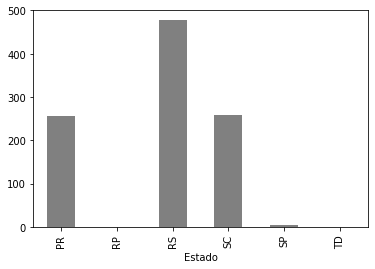

In [11]:
agrupado.plot.bar(color='gray')

In [12]:
#explore categoric data:
#Gender:
agrupado = dataset.groupby(['Genero']).size()
agrupado

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

<AxesSubplot:xlabel='Genero'>

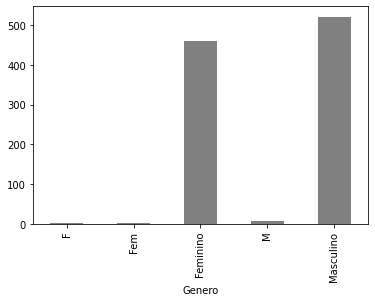

In [13]:
agrupado.plot.bar(color='gray')

In [14]:
#explore numeric columns:
#Score:
dataset['Score'].describe()

count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: Score, dtype: float64

C:\Users\User\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Score')

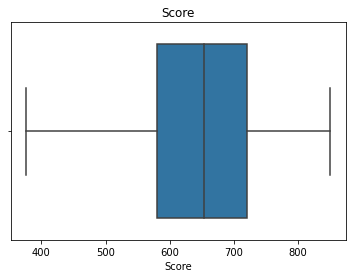

In [15]:
srn.boxplot(dataset['Score']).set_title('Score')

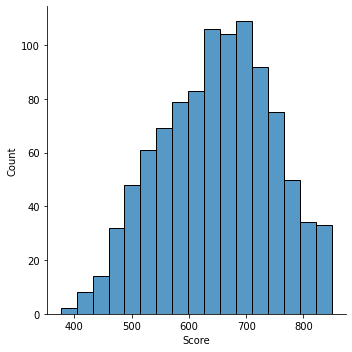

In [16]:
srn.displot(dataset['Score'])

In [17]:
#explore categoric columns:
#Age:
dataset['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

C:\Users\User\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Idade')

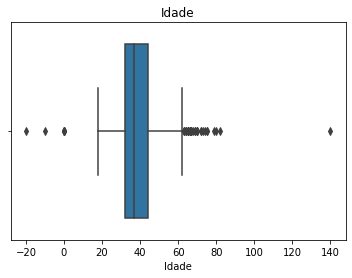

In [18]:
srn.boxplot(dataset['Idade']).set_title('Idade')

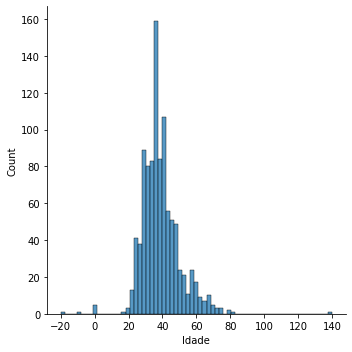

In [19]:
srn.displot(dataset['Idade'])

In [20]:
#explore numeric columns:
#Balance:
dataset['Saldo'].describe()

count    9.990000e+02
mean     7.164928e+06
std      6.311840e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.958835e+06
75%      1.258684e+07
max      2.117743e+07
Name: Saldo, dtype: float64

C:\Users\User\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Saldo')

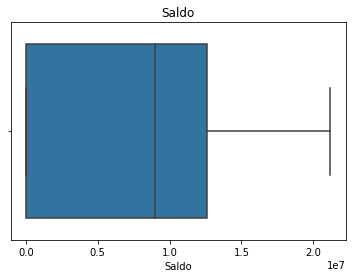

In [21]:
srn.boxplot(dataset['Saldo']).set_title('Saldo')

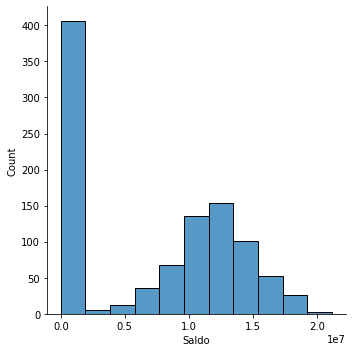

In [22]:
srn.displot(dataset['Saldo'])

In [23]:
#explore numeric columns:
#Salary:
dataset['Salario'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

C:\Users\User\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Salario')

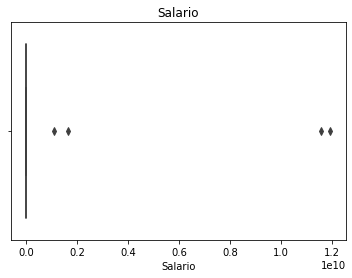

In [24]:
srn.boxplot(dataset['Salario']).set_title('Salario')

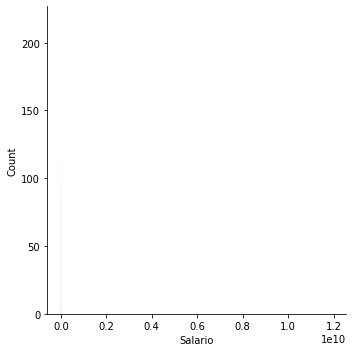

In [25]:
srn.displot(dataset['Salario'])

In [26]:
#count the NaN values:
#Gender and Salary:
dataset.isnull().sum()

Id                0
Score             0
Estado            0
Genero            8
Idade             0
Patrimonio        0
Saldo             0
Produtos          0
TemCartCredito    0
Ativo             0
Salario           7
Saiu              0
dtype: int64

In [27]:
#salary:
#remove NAs and replace with median:
dataset['Salario'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

In [28]:
mediana = sts.median(dataset['Salario'])
mediana

70518.0

In [31]:
#replace NaN with median:
dataset['Salario'].fillna(mediana, inplace=True)

In [33]:
#verify the existence of NaN values:
dataset['Salario'].isnull().sum()

0

In [38]:
#gender - lack of polarization and NAs:
agrupado = dataset.groupby(['Genero']).size()
agrupado

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

In [40]:
#total of Nas:
dataset['Genero'].isnull().sum()
#fill NAs with masculine(trend):
dataset['Genero'].fillna('Masculino', inplace=True)
#verify again the NAs:
dataset['Genero'].isnull().sum()

0

In [42]:
#set pattern acording to domain:
dataset.loc[dataset['Genero'] == 'M', 'Genero'] = 'Masculino'
dataset.loc[dataset['Genero'].isin(['Fem', 'F']), 'Genero'] = 'Feminino'
#show results:
agrupado = dataset.groupby(['Genero']).size()
agrupado

Genero
Feminino     464
Masculino    535
dtype: int64